<a href="https://colab.research.google.com/github/JoeAM11/MachineLearning_EM23/blob/main/Tarea04_ML_Febrero_FeatureSelection_MetodosEnvoltura_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🤖 📓
# Tarea #04
#### Nombre :Joel Alejandro Rodarte Rivera 
#### Matrícula: 2173260

El siguiente cuaderno contiene:
*  Métodos de filtro
  * Anova de valor de F.
  * Valor R d correlación.
  * Umbral de varianza 

* Revisón de literatura
  * Se investiga sobre las siguiente preguntas:
    * ¿Cuántas características se utilizan en los modelos médicos de predicción?
    * ¿Cuáles son los métodos más comúnes para selección de características en el área médica? 
  
* Wrapper 
  * Selección de caracterstica exhaustiva 



 




###  Dudas

* Para esta tarea estuve trabajando con variables predictivas numericas para predecir otra variable numerica. En este caso usar 131 sítnomas para predecir la presencia de vómito.
  * Me interesa saber cómo realizar lo mismo de esta tarea pero para predecir una variable categórica como el nombre de una enfermedad. 
  * ¿Cómo funciona los feature selections para variables categóricas en general?

### Comentarios de interés para tesis 

* Cross correlations con lag (clase 30 enero minuto 35) 

* Conclusiones para datos tipicos y outliers (minuto 44 clase 30 enero) 




In [126]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MachineLearning_EM23/Testing.csv') #Importar el csv desde mi repositorio en Guthub

fatal: destination path 'MachineLearning_EM23' already exists and is not an empty directory.


In [127]:
# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

In [133]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10) #Para evitar que me trunque informacióno o que no despliegue tanta, segun sea necesario 
df = df[df.columns[::-1]] # Me es más logico tener la enfermedad en la primera columna por motivos de organización. 

In [ ]:
df.head()

In [ ]:
df.drop(columns=['prognosis'],inplace=True) #necesario quitar para poder hacer el siguiente paso. 

#duda --> como realizar lo siguiente sin tener que utilizar inplace.

In [ ]:
s = df.sum() #sumando todos los 1 de cada columna 
s.sort_values(ascending=False) #De mayor a menor cualse son los sintomas más comunes 

#Vomiting resulta ser el síntoma más repetido, lo utilizaré para predecir su presencia. 

Objetivo 

Determinar cuales son las variable que mas efecto podría tener sobre el síntoma vomito, el cual es el síntoma más común de todos considerando todas las enfermedades.

### ANOVA de valor de F

Entre más grande sea el valor del estadístico F --> Más información aporta al modelo. 

Valores pequeños de F --> Poca relación lineal de esa variable en el modelo. 



In [139]:
vindex = df.columns.get_loc("vomiting") #el index a quitar de la siguiente lista 
dfy = df.iloc[:,120:121] #obtener solamente vomiting 
dfy

,vomiting
0,0
1,0
2,1
3,1
4,0
...,...
37,0
38,0
39,0
40,0


In [140]:
dfx = df.loc[:, df.columns != 'vomiting'] #un nuevo data frame que no incluye a vomiting
dfx

,yellow_crust_ooze,red_sore_around_nose,blister,inflammatory_nails,small_dents_in_nails,...,shivering,continuous_sneezing,nodal_skin_eruptions,skin_rash,itching
0,0,0,0,0,0,...,0,0,1,1,1
1,0,0,0,0,0,...,1,1,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,1
4,0,0,0,0,0,...,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
37,0,0,0,0,0,...,0,0,0,1,0
38,0,0,0,0,0,...,0,0,0,0,0
39,0,0,0,1,1,...,0,0,0,1,0
40,1,1,1,0,0,...,0,0,0,1,0


In [142]:
from sklearn.feature_selection import f_regression
f_value = f_regression(dfx,dfy)
f_value #Resultado de la regresión F 

(array([6.74603175e-01, 1.40786749e+00, 6.74603175e-01, 6.74603175e-01,
        6.74603175e-01, 6.74603175e-01, 1.40786749e+00, 6.74603175e-01,
        6.74603175e-01, 6.74603175e-01, 1.40786749e+00, 1.48809524e+00,
        6.74603175e-01, 1.48809524e+00, 1.48809524e+00, 1.48809524e+00,
        1.48809524e+00, 1.48809524e+00, 1.48809524e+00, 6.74603175e-01,
        6.74603175e-01, 6.74603175e-01, 6.74603175e-01, 6.74603175e-01,
        6.74603175e-01, 2.20779221e+00, 6.74603175e-01, 6.74603175e-01,
        6.74603175e-01, 6.74603175e-01, 1.40786749e+00, 1.48809524e+00,
        6.52646846e-02, 1.48809524e+00, 2.19740022e+00, 4.23002315e-01,
        1.40786749e+00, 1.48809524e+00, 1.48809524e+00, 1.48809524e+00,
        6.74603175e-01, 6.74603175e-01, 6.74603175e-01, 6.74603175e-01,
        1.48809524e+00, 1.48809524e+00, 6.52646846e-02, 1.48809524e+00,
        6.74603175e-01, 1.40786749e+00, 1.40786749e+00, 1.40786749e+00,
        6.74603175e-01, 6.74603175e-01, 1.48809524e+00, 1.488095

In [102]:
import numpy as np

In [143]:
df_results = pd.DataFrame(f_value[0], index=dfx.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False) #las variables más linealmente relacionada de mayor a menor 
df_results

,f_value
nausea,18.661146
abdominal_pain,14.444876
yellowish_skin,5.269424
loss_of_appetite,5.098819
diarrhoea,3.841307
...,...
swelled_lymph_nodes,0.065265
loss_of_balance,0.065265
fatigue,0.005537
cough,0.000509


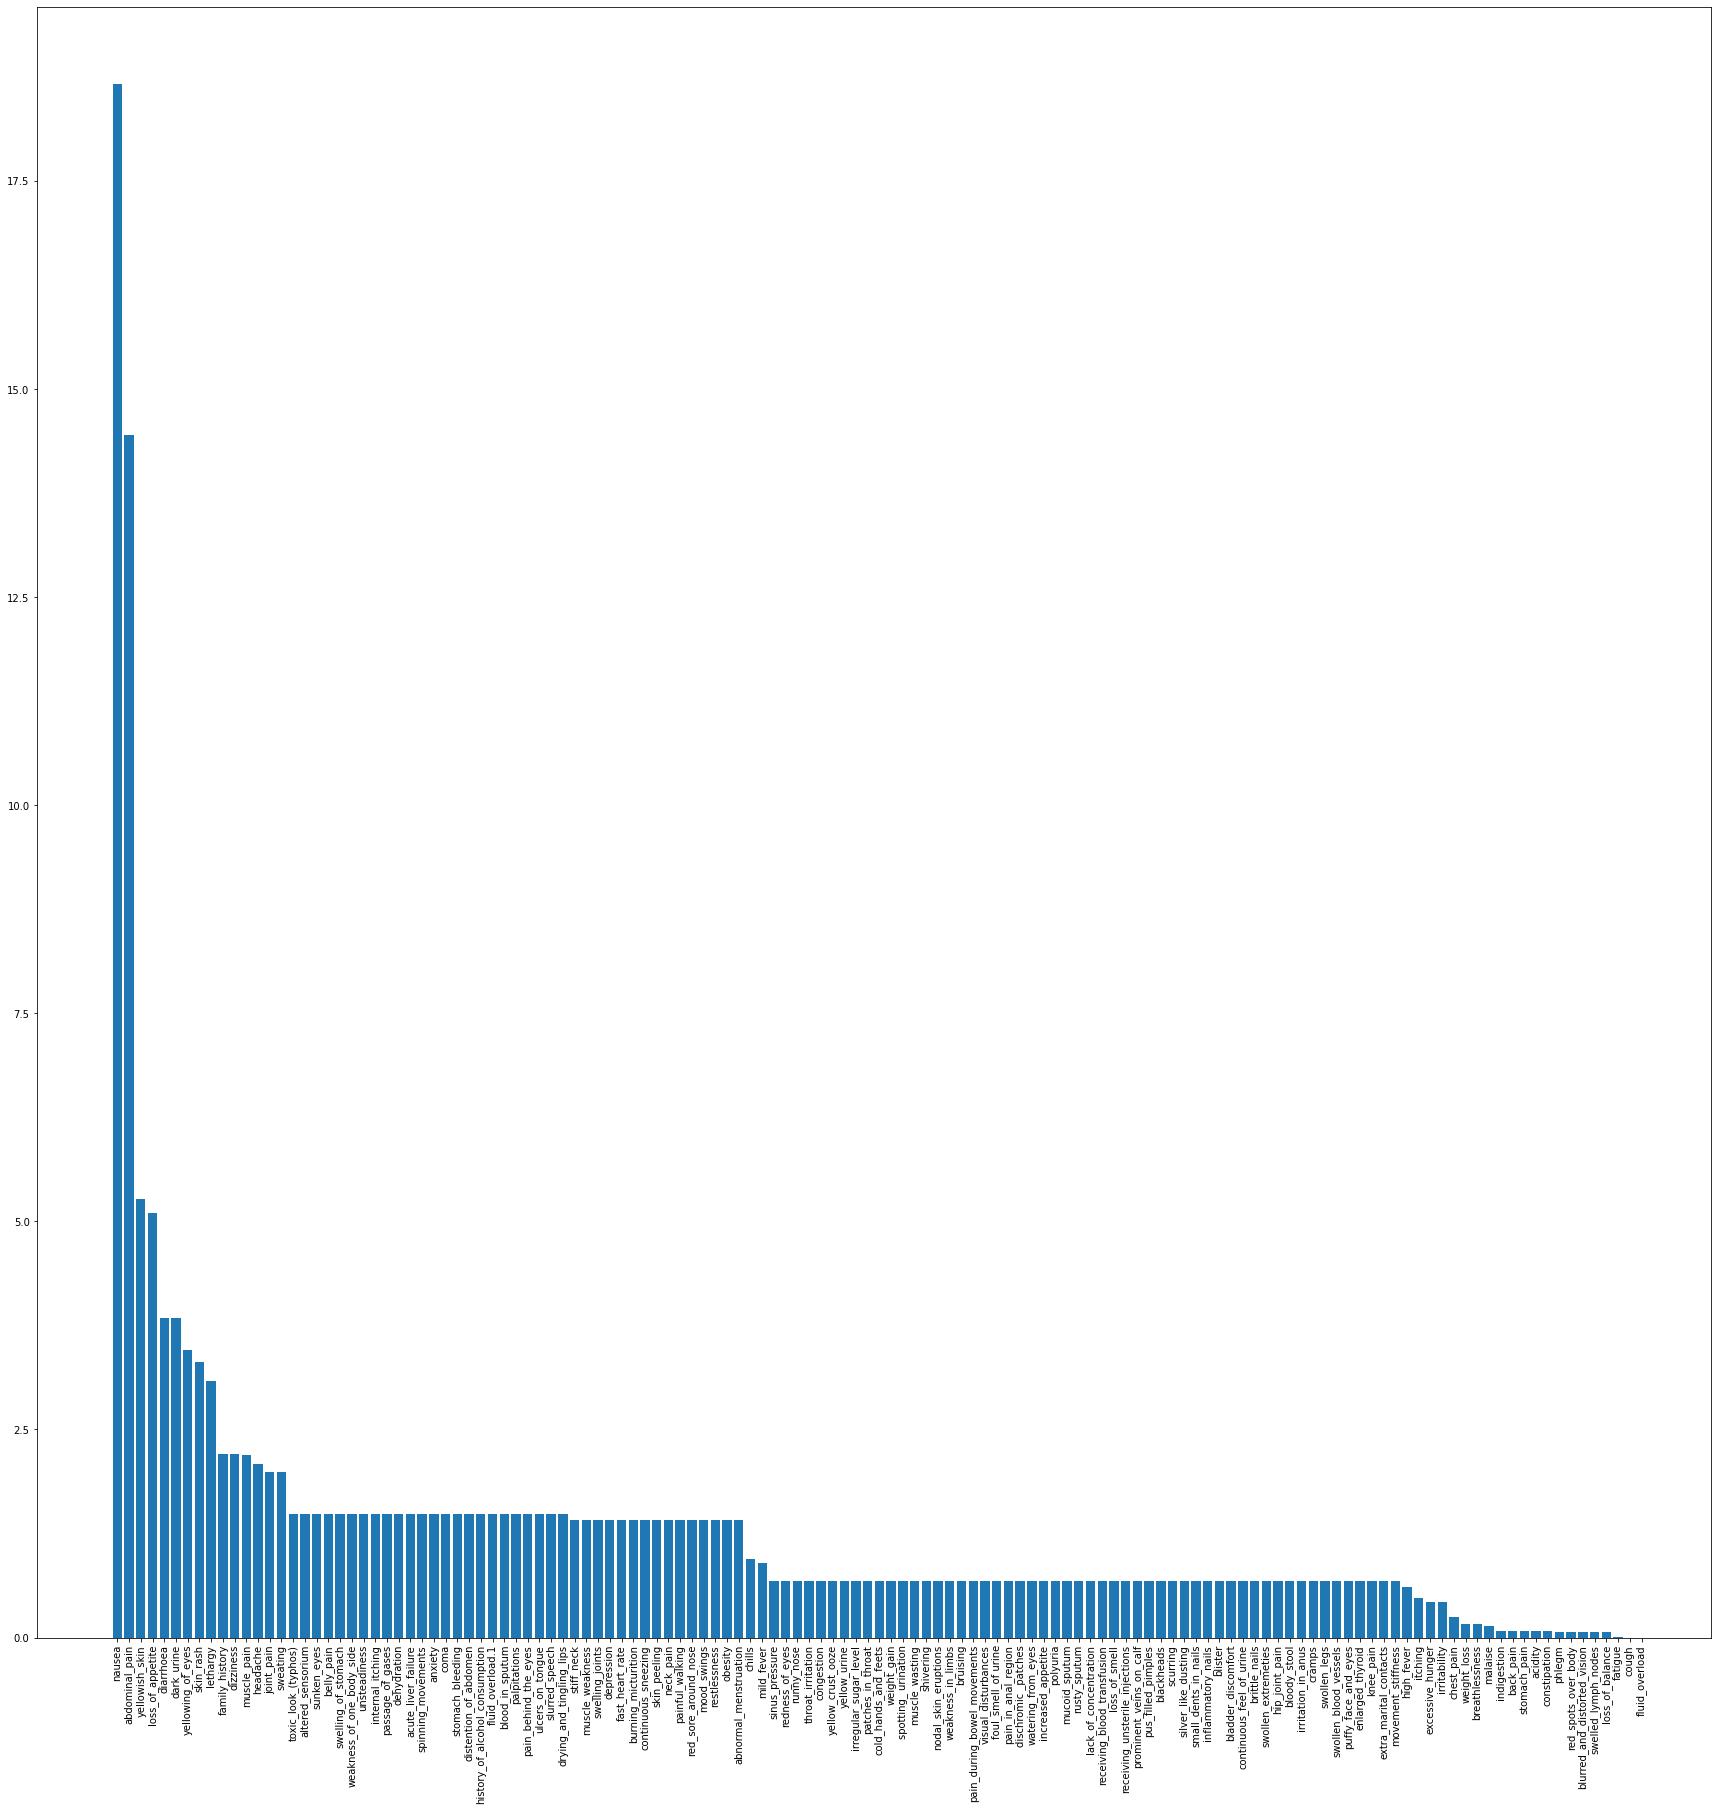

In [144]:
plt.figure(figsize = (30, 30))
plt.xticks(rotation=90)
plt.bar(df_results.index, df_results.f_value)
plt.show()

### Valor R de correlación


In [145]:
from sklearn.feature_selection import r_regression
r_value = r_regression(dfx, dfy)
r_value #tupla de correlacion de la variable 

array([-0.12878418, -0.18439089, -0.12878418, -0.12878418, -0.12878418,
       -0.12878418, -0.18439089, -0.12878418, -0.12878418, -0.12878418,
       -0.18439089,  0.1893885 , -0.12878418,  0.1893885 ,  0.1893885 ,
        0.1893885 ,  0.1893885 ,  0.1893885 ,  0.1893885 , -0.12878418,
       -0.12878418, -0.12878418, -0.12878418, -0.12878418, -0.12878418,
       -0.22870875, -0.12878418, -0.12878418, -0.12878418, -0.12878418,
       -0.18439089,  0.1893885 , -0.04036037,  0.1893885 ,  0.22819795,
       -0.10229563, -0.18439089,  0.1893885 ,  0.1893885 ,  0.1893885 ,
       -0.12878418, -0.12878418, -0.12878418, -0.12878418,  0.1893885 ,
        0.1893885 , -0.04036037,  0.1893885 , -0.12878418, -0.18439089,
       -0.18439089, -0.18439089, -0.12878418, -0.12878418,  0.1893885 ,
        0.1893885 , -0.12878418, -0.10229563, -0.12878418, -0.12878418,
       -0.12878418, -0.12878418, -0.12878418, -0.12878418, -0.18439089,
       -0.12878418, -0.12878418, -0.22870875, -0.18439089, -0.12

In [146]:
Rdf_results = pd.DataFrame(r_value, index=dfx.columns)
Rdf_results.columns = ['r_value']
Rdf_results.sort_values('r_value', inplace = True, ascending = False) #las variables más linealmente relacionada de mayor a menor 
Rdf_results

,r_value
nausea,0.564019
abdominal_pain,0.515084
yellowish_skin,0.341176
loss_of_appetite,0.336242
diarrhoea,0.296004
...,...
family_history,-0.228709
dizziness,-0.228709
lethargy,-0.267542
skin_rash,-0.276471


### Umbral de varianzas 
Las variabl con más varianza --> Son las que más explican el comportamiento del modeo

Varaibles con poca varianza -->  aportan poca información al modelo  



In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfx)
x_scaled = pd.DataFrame(scaled, columns = dfx.columns)
x_scaled #todo este dataframe dado solo tengo valores de 0 o 1 su escalamiento me dará otra matriz de 0 y 1 

,yellow_crust_ooze,red_sore_around_nose,blister,inflammatory_nails,small_dents_in_nails,...,shivering,continuous_sneezing,nodal_skin_eruptions,skin_rash,itching
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
37,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0
38,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0
40,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0


In [148]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.02324263, 0.04535147, 0.02324263, 0.02324263, 0.02324263,
       0.02324263, 0.04535147, 0.02324263, 0.02324263, 0.02324263,
       0.04535147, 0.02324263, 0.02324263, 0.02324263, 0.02324263,
       0.02324263, 0.02324263, 0.02324263, 0.02324263, 0.02324263,
       0.02324263, 0.02324263, 0.02324263, 0.02324263, 0.02324263,
       0.06632653, 0.02324263, 0.02324263, 0.02324263, 0.02324263,
       0.04535147, 0.02324263, 0.06632653, 0.02324263, 0.0861678 ,
       0.0861678 , 0.04535147, 0.02324263, 0.02324263, 0.02324263,
       0.02324263, 0.02324263, 0.02324263, 0.02324263, 0.02324263,
       0.02324263, 0.06632653, 0.02324263, 0.02324263, 0.04535147,
       0.04535147, 0.04535147, 0.02324263, 0.02324263, 0.02324263,
       0.02324263, 0.02324263, 0.0861678 , 0.02324263, 0.02324263,
       0.02324263, 0.02324263, 0.02324263, 0.02324263, 0.04535147,
       0.02324263, 0.02324263, 0.06632653, 0.04535147, 0.02324263,
       0.02324263, 0.02324263, 0.02324263, 0.04535147, 0.02324

In [149]:
Rdf_results['variance'] = selector.variances_ #añadir columna a mis df ya existente que tenia los resultados de R regresion
Rdf_results.sort_values('variance', ascending = False, inplace = True)
Rdf_results

,r_value,variance
restlessness,-0.184391,0.240930
brittle_nails,-0.128784,0.204082
inflammatory_nails,-0.128784,0.181406
irritation_in_anus,-0.128784,0.181406
bloody_stool,-0.128784,0.181406
...,...,...
redness_of_eyes,-0.128784,0.023243
itching,-0.108465,0.023243
stomach_pain,0.043386,0.023243
indigestion,0.043386,0.023243


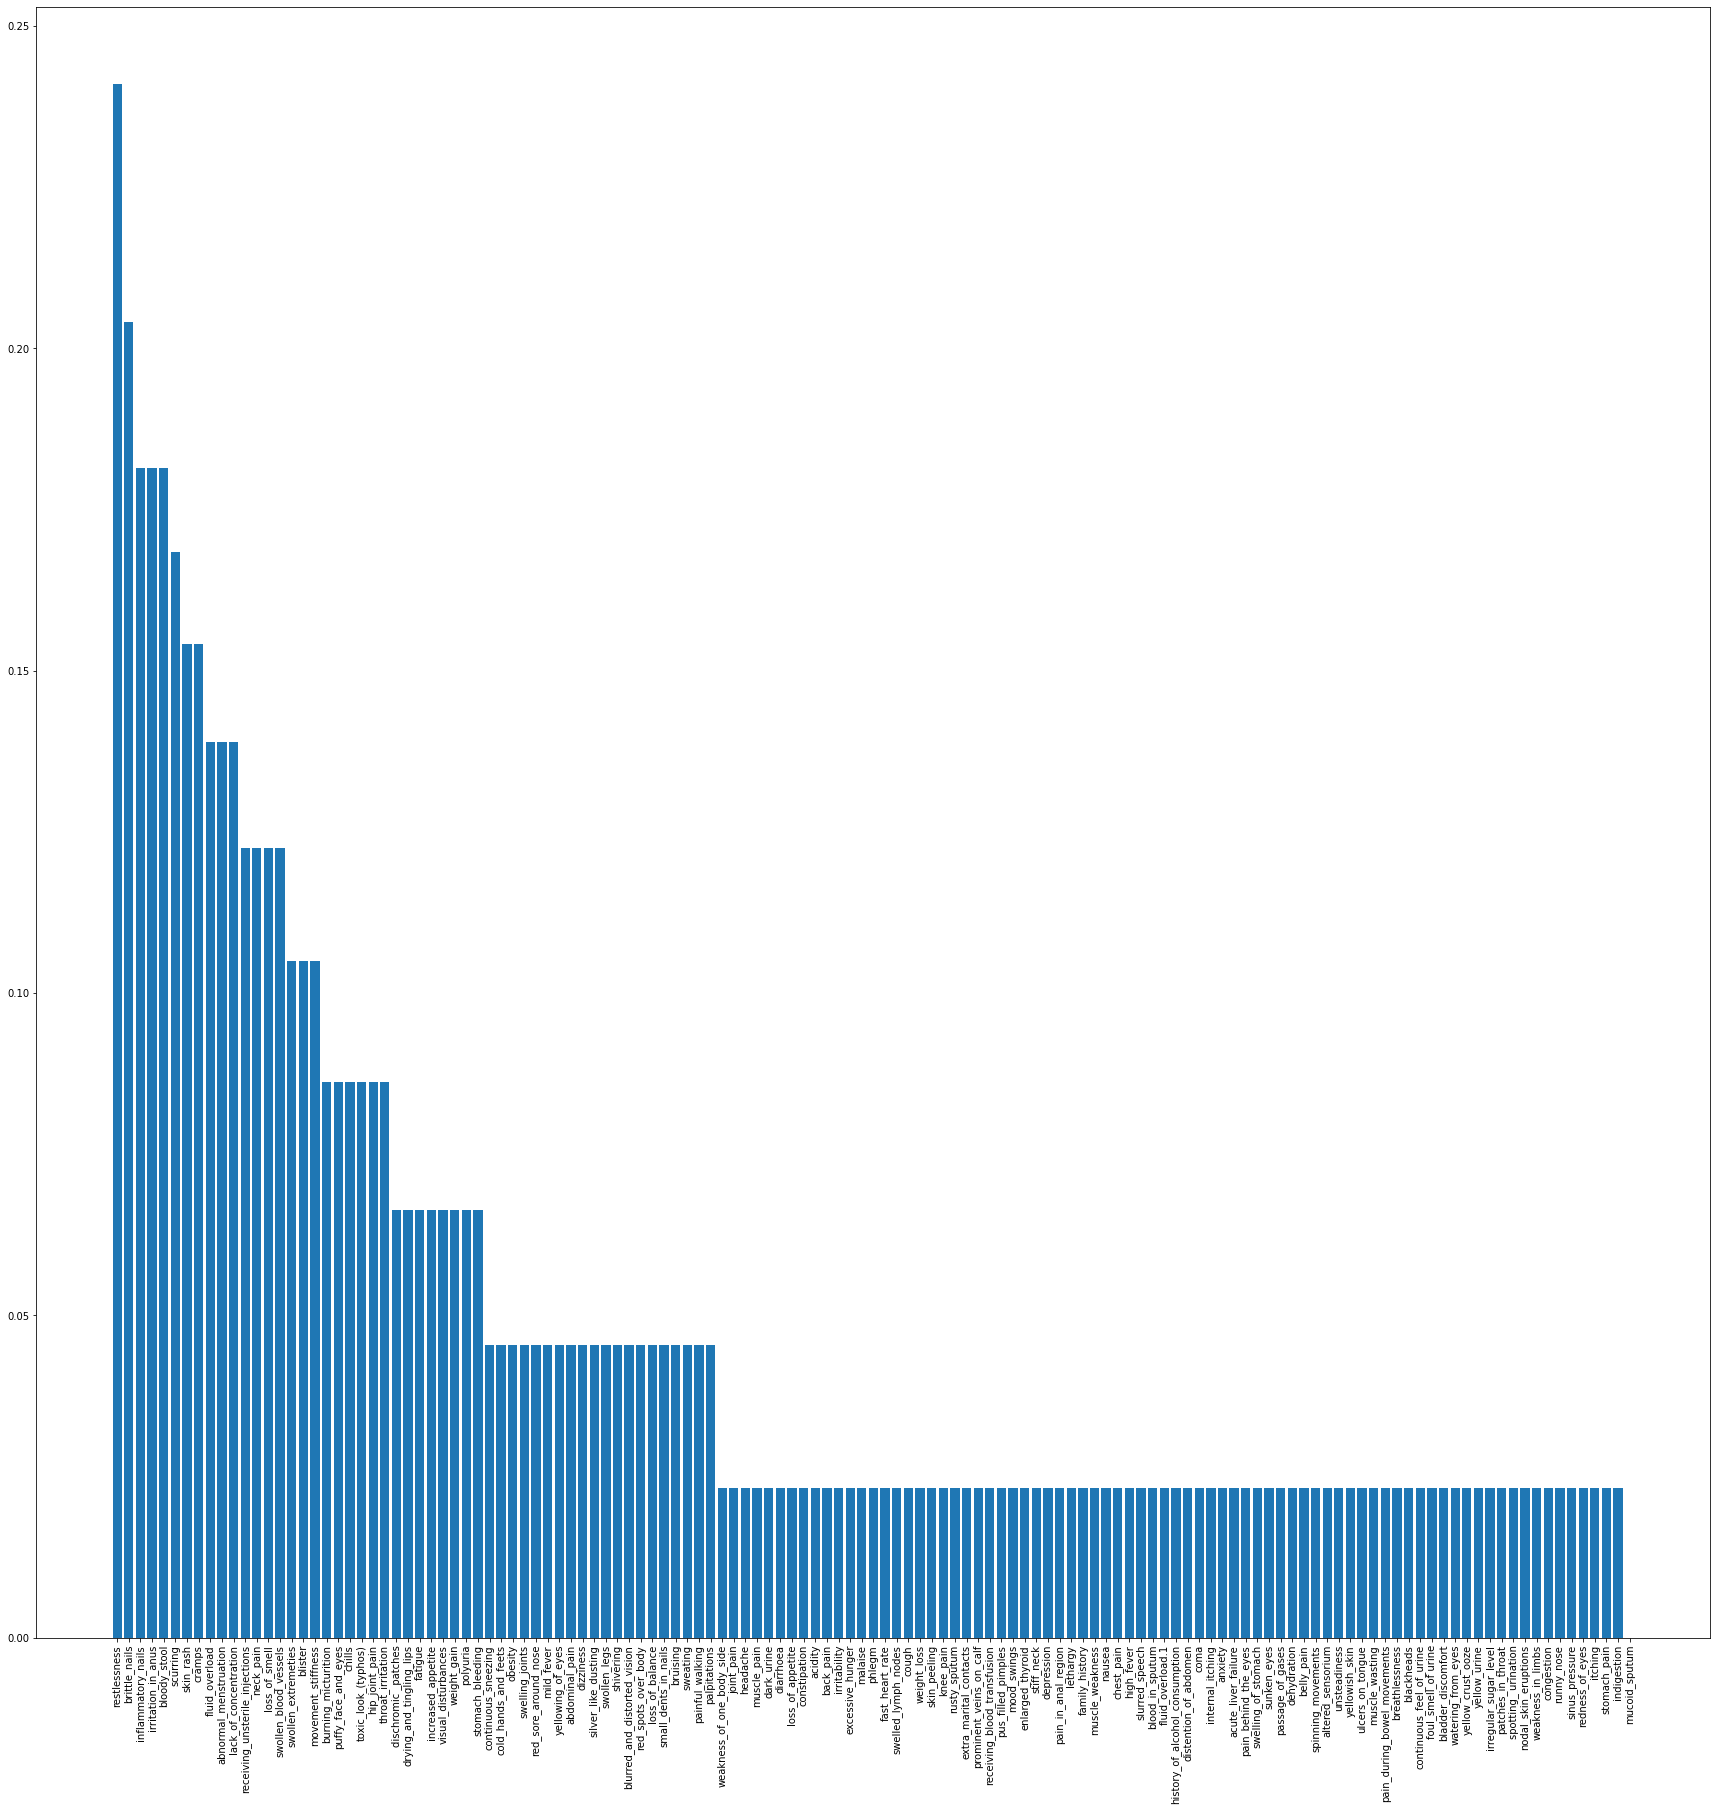

In [150]:
plt.figure(figsize = (30, 30))
plt.xticks(rotation=90)
plt.bar(Rdf_results.index, Rdf_results['variance'])
plt.show()

# Feature Selection para area médica ⚕

El mejor método de selección de características para modelos estadísticos médicos depende de los requisitos específicos de cada caso individual. Sin embargo para el estudio referenciado menciona que los más comunes son Wrappers, Filtros y embebidos. El diagrama de abajo muestra la metodología que se utilizó en ese trabajo, el cual puede servirme de referencia para ver cuáles son los comúnes en el area médica ya que en ese se trabajó con dos sets de datos de índole médica. 

La elección del mejor método de selección de características dependerá de la naturaleza de los datos, el número de características y la complejidad de las relaciones entre las características y la variable objetivo. También puede ser útil probar varios métodos y comparar su rendimiento para determinar el mejor para un caso dado. En este caso utilizaron los tres mejores modelos para cada uno de los tres tipo de feature selection para después combinarlos y evaluarlos con una técnica que este momento desconozco cómo funciona, llamda support vector classifier. 

En este paper utilizan como umbral solo los modelos que regresan un performance mayor a 80% con solo tres variables de predicción. De nueva cuenta no es una regla que vaya a funcionar siempre dado hay muchos factores que pueden afectar (calidad de datos, dependencia de variables, etc). A reserva de encontrar una mejor referencia para decidir cuantas variables es recomendado incluir, para esta tarea utilizaré 3 variables de prdicción. 

[A Novel Feature Selection Method for Classification of Medical Data Using Filters, Wrappers, and Embedded Approaches](https://www.hindawi.com/journals/complexity/2022/8190814/)

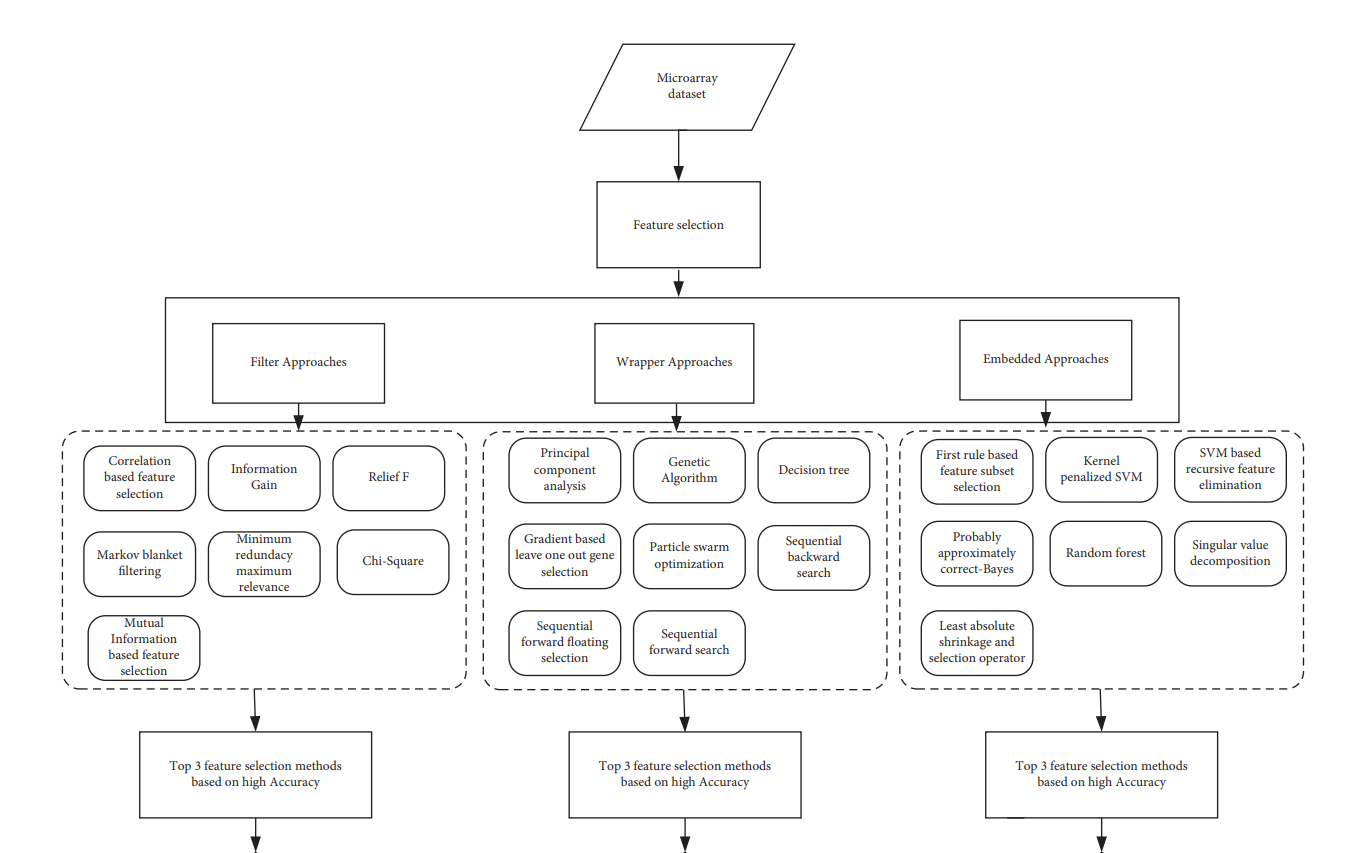
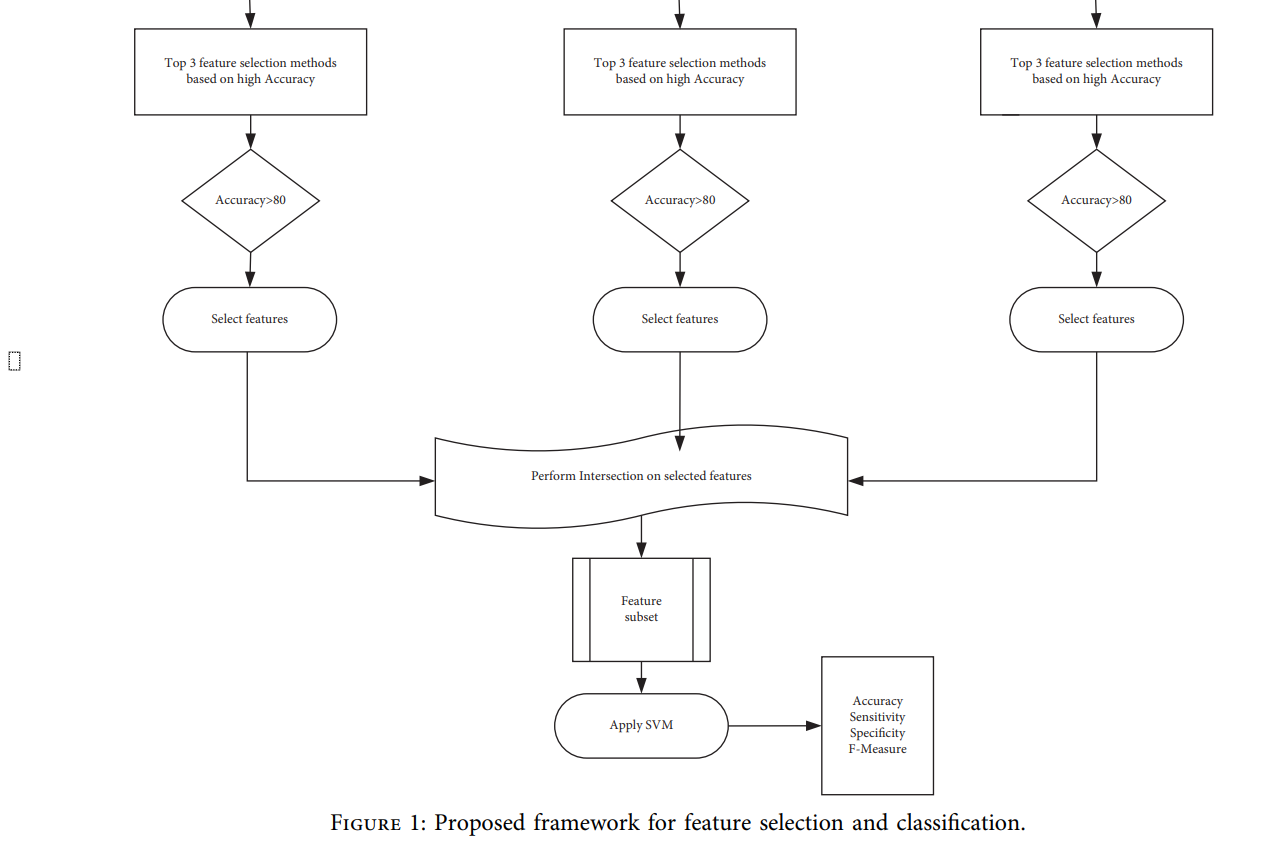

## Metodos de envoltura
### EFS (Exhausive Feature Selection) 

In [ ]:
#codigo encontrado en stack overflow que me ayudo a quitar un error que tenia al importar EFS 
# https://stackoverflow.com/questions/70163883/google-colab-modulenotfounderror-no-module-named-sklearn-externals-joblib

!pip install mlxtend 
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [152]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [161]:
lr = LinearRegression()

efs = EFS(estimator = lr,        # Use logistic regression as the classifier/estimator
          min_features = 1,      # The minimum number of features to consider is 1
          max_features = 3,      # The maximum number of features to consider is 4
          scoring='neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)

Los features que tenian mejor desempeño para la prueba de feature selection de Anova con el estadistico F y la regresión R fueron: 
*   Nausea
*   Abdominal Pain
*   Yellowish skin

A pesar de no ser un experto en el área médica, por experiencias de vida, me hace sentido que las variables que están más relacionadas con vómito sean las mencionadas anteriromente dado que cuando sentimos dolor estomacal o nausea, es probable que esos síntomas se presenten antes y después de vomitar. 







In [162]:
dfx_reduced = dfx[["nausea","abdominal_pain","yellowish_skin"]] #arbitriariamente cambiarlo a 5 para ver si corre
dfx_reduced

,nausea,abdominal_pain,yellowish_skin
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0
...,...,...,...
37,0,0,0
38,0,0,0
39,0,0,0
40,0,0,0


In [163]:
efs = efs.fit(dfx_reduced, dfy)

Features: 7/7

In [164]:
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Best accuracy score: -0.34
Best subset (indices): (0,)
Best subset (corresponding names): ('nausea',)


In [165]:
#En dado caso que nausea no sea un sintoma, o que no conozcamos su existencia los siguiente modelos me pueden ayudar a predecir vomito.
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending=False,  inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[-0.3919753086419753, -0.32999999999999996, -0...",-0.335778,"(nausea,)",0.043029,0.033478,0.016739
6,"(0, 1, 2)","[-0.3051709856821678, -0.3211823216909686, -0....",-0.342186,"(nausea, abdominal_pain, yellowish_skin)",0.12297,0.095675,0.047837
1,"(1,)","[-0.34371184371184366, -0.4005555555555555, -0...",-0.349853,"(abdominal_pain,)",0.069025,0.053703,0.026852
5,"(1, 2)","[-0.3400469956361195, -0.40785907859078585, -0...",-0.352673,"(abdominal_pain, yellowish_skin)",0.072268,0.056227,0.028113
3,"(0, 1)","[-0.33832112915207474, -0.32484311554079, -0.5...",-0.361314,"(nausea, abdominal_pain)",0.1427,0.111026,0.055513
4,"(0, 2)","[-0.37684389260320494, -0.3300433677284283, -0...",-0.370297,"(nausea, yellowish_skin)",0.116303,0.090487,0.045244
2,"(2,)","[-0.4334554334554334, -0.4334554334554334, -0....",-0.426627,"(yellowish_skin,)",0.009764,0.007597,0.003798
